In [ ]:
import numpy as np
import plotly.graph_objects as go

# Constants
M = 1  # Mass term in eV (related to the gap)
A = 1.0  # Parameter related to the quadratic dispersion (in eV·Å^2)
B = 1.0  # Spin-orbit interaction parameter (in eV·Å^2)
a = 1.42  # Lattice constant in Ångströms

# Reciprocal lattice vectors for the 2D model
kx_vals = np.linspace(-4 * np.pi / (3 * a), 4 * np.pi / (3 * a), 200)
ky_vals = np.linspace(-4 * np.pi / (np.sqrt(3) * a), 4 * np.pi / (np.sqrt(3) * a), 200)

# Calculate energy at each point (kx, ky) for the Qi-Wu-Zhang model
def energy_band(kx, ky):
    epsilon_k = kx**2 + ky**2  # Kinetic energy term (assuming m=1 for simplicity)
    Delta_k = M - A * (kx**2 + ky**2)  # Mass term
    lambda_k = B * kx * ky  # Spin-orbit interaction term

    energy_plus = np.sqrt(Delta_k**2 + lambda_k**2 + epsilon_k**2)  # Upper energy band
    energy_minus = -np.sqrt(Delta_k**2 + lambda_k**2 + epsilon_k**2)  # Lower energy band
    return energy_plus, energy_minus

# Prepare meshgrid for kx and ky
KX, KY = np.meshgrid(kx_vals, ky_vals)
energy_plus, energy_minus = energy_band(KX, KY)

# Create the Plotly 3D Surface plot for both bands
fig = go.Figure()

# Add the positive energy band
fig.add_trace(go.Surface(
    z=energy_plus,
    x=KX,
    y=KY,
    colorscale='Viridis',
    opacity=0.8,
    name="Positive Band"
))

# Add the negative energy band
fig.add_trace(go.Surface(
    z=energy_minus,
    x=KX,
    y=KY,
    colorscale='Plasma',
    opacity=0.8,
    name="Negative Band"
))

# Update the layout for better visualization
fig.update_layout(
    title="Interactive 3D Band Structure of Qi-Wu-Zhang Model",
    scene=dict(
        xaxis_title=r'$k_x$ ($\frac{2\pi}{a}$)',
        yaxis_title=r'$k_y$ ($\frac{2\pi}{a}$)',
        zaxis_title="Energy (eV)",
        xaxis=dict(gridcolor='rgba(200, 200, 200, 0.5)', showgrid=True),
        yaxis=dict(gridcolor='rgba(200, 200, 200, 0.5)', showgrid=True),
        zaxis=dict(gridcolor='rgba(200, 200, 200, 0.5)', showgrid=True),
    ),
    width=1000,  # Width of the figure in pixels
    height=800   # Height of the figure in pixels
)

# Show the interactive plot
fig.show()


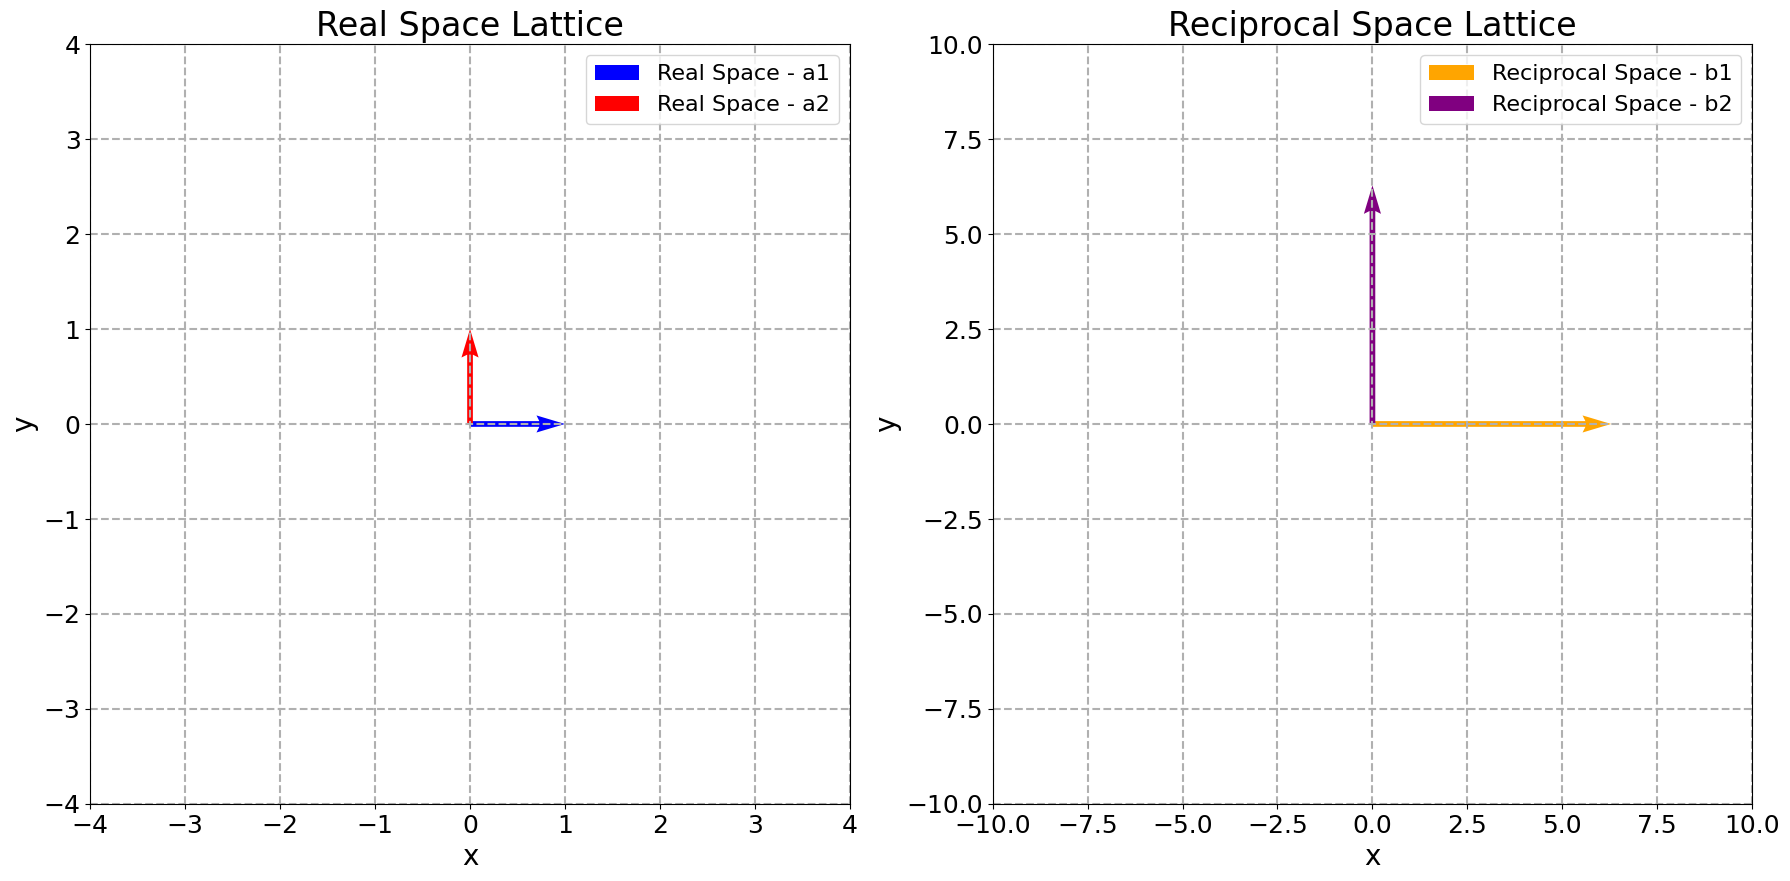

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the real space vectors for a square lattice
a1 = np.array([1, 0])  # a1 = [1, 0]
a2 = np.array([0, 1])  # a2 = [0, 1]

# Define the reciprocal lattice vectors for a square lattice
b1 = np.array([2 * np.pi, 0])  # b1 = [2π, 0]
b2 = np.array([0, 2 * np.pi])  # b2 = [0, 2π]

# Create a figure with two subplots with larger figure size
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 10))

# Plot real space vectors on the first subplot (ax1)
ax1.quiver(0, 0, a1[0], a1[1], angles='xy', scale_units='xy', scale=1, color='blue', label="Real Space - a1", linewidth=3)
ax1.quiver(0, 0, a2[0], a2[1], angles='xy', scale_units='xy', scale=1, color='red', label="Real Space - a2", linewidth=3)
ax1.set_xlim(-4, 4)
ax1.set_ylim(-4, 4)
ax1.set_xlabel('x', fontsize=20)
ax1.set_ylabel('y', fontsize=20)
ax1.set_title('Real Space Lattice', fontsize=24)
ax1.grid(True, which='both', linestyle='--', linewidth=1.5)
ax1.set_aspect('equal')
ax1.legend(fontsize=16)
ax1.tick_params(axis='both', which='major', labelsize=18)
# plt.savefig("Real_space.png", dpi=750)

# Plot reciprocal space vectors on the second subplot (ax2)
ax2.quiver(0, 0, b1[0], b1[1], angles='xy', scale_units='xy', scale=1, color='orange', label="Reciprocal Space - b1", linewidth=3)
ax2.quiver(0, 0, b2[0], b2[1], angles='xy', scale_units='xy', scale=1, color='purple', label="Reciprocal Space - b2", linewidth=3)
ax2.set_xlim(-10, 10)
ax2.set_ylim(-10, 10)
ax2.set_xlabel('x', fontsize=20)
ax2.set_ylabel('y', fontsize=20)
ax2.set_title('Reciprocal Space Lattice', fontsize=24)
ax2.grid(True, which='both', linestyle='--', linewidth=1.5)
ax2.set_aspect('equal')
ax2.legend(fontsize=16)
ax2.tick_params(axis='both', which='major', labelsize=18)
plt.savefig("Reciprocal_space.png", dpi=750)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


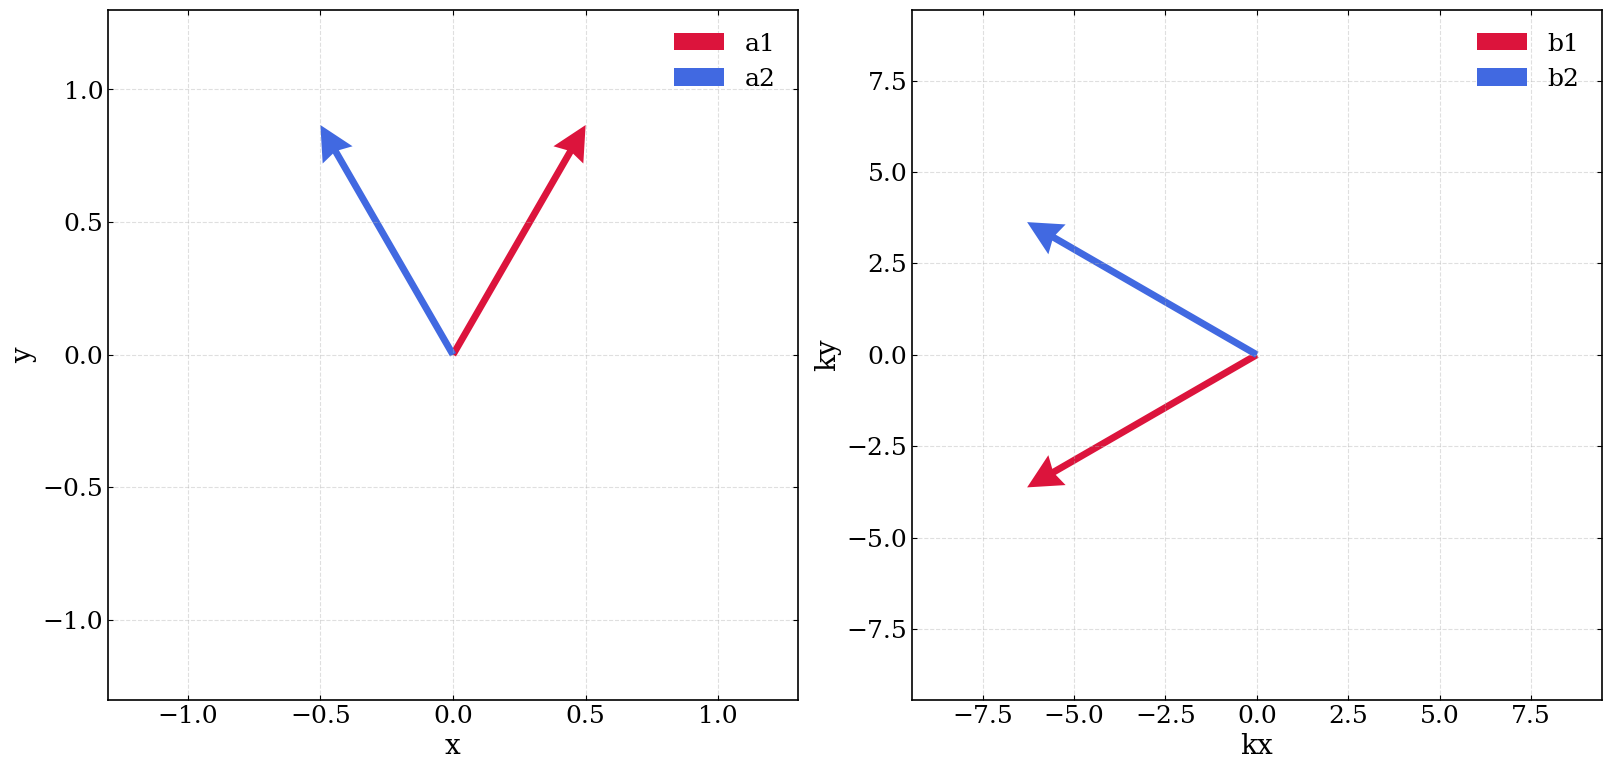

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

# --- Make sure LaTeX rendering is OFF ---
rcParams['text.usetex'] = False     # force off, even if set earlier

# --- Nice but simple style ---
rcParams.update({
    "font.size": 18,
    "font.family": "serif",
    "axes.linewidth": 1.2,
    "axes.labelsize": 20,
    "legend.fontsize": 18,
    "xtick.direction": "in",
    "ytick.direction": "in",
    "xtick.top": True,
    "ytick.right": True,
})

# Lattice data
a = 1.0
a1 = a * np.array([0.5, np.sqrt(3)/2])
a2 = a * np.array([-0.5, np.sqrt(3)/2])
b1 = (2*np.pi/a) * np.array([-1, -1/np.sqrt(3)])
b2 = (2*np.pi/a) * np.array([-1,  1/np.sqrt(3)])

fig, axes = plt.subplots(1, 2, figsize=(16,9), constrained_layout=True)

def draw_vectors(ax, v1, v2, c1='crimson', c2='royalblue', l1='a1', l2='a2'):
    ax.quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1,
              color=c1, width=0.01, headwidth=5, label=l1)
    ax.quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy', scale=1,
              color=c2, width=0.01, headwidth=5, label=l2)
    lim = 1.3 * max(np.linalg.norm(v1), np.linalg.norm(v2))
    ax.set_xlim(-lim, lim)
    ax.set_ylim(-lim, lim)
    ax.set_aspect('equal')
    ax.grid(True, linestyle='--', alpha=0.4)
    ax.legend(frameon=False)

# Real-space lattice
# axes[0].set_title('Real-space lattice')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
draw_vectors(axes[0], a1, a2, l1='a1', l2='a2')

# Reciprocal-space lattice
# axes[1].set_title('Reciprocal-space lattice')
axes[1].set_xlabel('kx')
axes[1].set_ylabel('ky')
draw_vectors(axes[1], b1, b2, l1='b1', l2='b2')

# Save high-quality outputs
fig.savefig("hexagonal_real_recip.pdf")   # vector graphic
fig.savefig("hexagonal_real_recip.svg")   # vector graphic
fig.savefig("hexagonal_real_recip.png", dpi=300)  # high-res bitmap

plt.show()


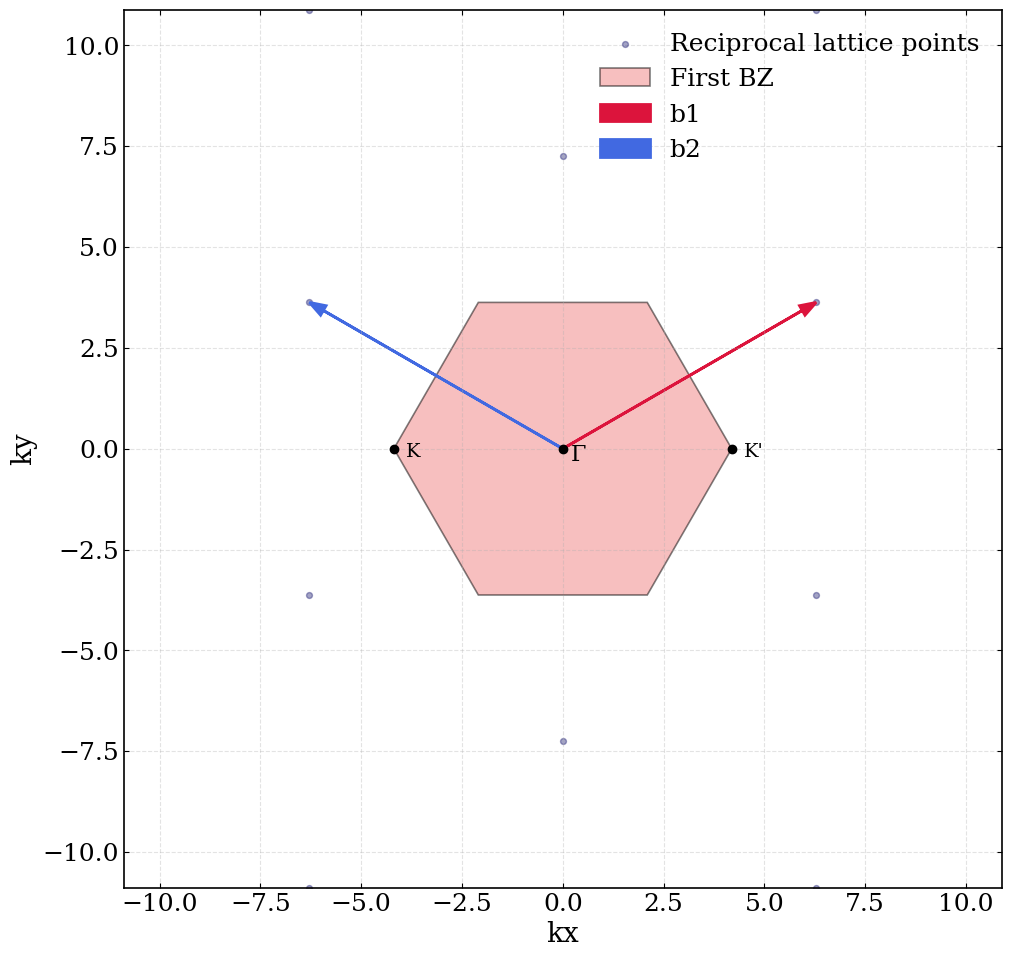

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.patches import Polygon

# --------- Style ---------
rcParams['text.usetex'] = False
rcParams.update({
    "font.size": 18,
    "font.family": "serif",
    "axes.linewidth": 1.2,
    "axes.labelsize": 20,
    "legend.fontsize": 18,
    "xtick.direction": "in",
    "ytick.direction": "in",
    "xtick.top": True,
    "ytick.right": True,
})

# --------- Lattice constants and reciprocal vectors ---------
a = 1.0
b1 = (2*np.pi/a) * np.array([1.0, 1.0/np.sqrt(3.0)])
b2 = (2*np.pi/a) * np.array([-1.0, 1.0/np.sqrt(3.0)])

# High-symmetry points
Gamma = np.array([0.0, 0.0])
K1, K2, K3 = (2*b1 + b2)/3, (b1 + 2*b2)/3, (-b1 + b2)/3
Kpts = np.array([K1, K2, K3, -K1, -K2, -K3])  # 6 BZ corners

# First BZ as a filled hexagon
BZ_hex = Kpts

# --------- Figure ---------
fig, ax = plt.subplots(figsize=(10,10), constrained_layout=True)
# ax.set_title("First Brillouin Zone (Hexagonal/Honeycomb)")

# Reciprocal lattice points (a small grid)
n = np.arange(-2, 3)
rl_points = np.array([i*b1 + j*b2 for i in n for j in n])
ax.scatter(rl_points[:,0], rl_points[:,1], s=18, alpha=0.4,
           color='midnightblue', label="Reciprocal lattice points")

# Shade first BZ
poly = Polygon(BZ_hex, closed=True, facecolor='lightcoral',
               edgecolor='black', alpha=0.5, linewidth=1.2, label="First BZ")
ax.add_patch(poly)

# Draw reciprocal lattice primitive vectors
def arrow(v, color, label):
    ax.arrow(0,0,v[0],v[1], length_includes_head=True,
             head_width=0.15*np.linalg.norm(b1)/4,
             head_length=0.22*np.linalg.norm(b1)/4,
             linewidth=2, color=color, label=label)
arrow(b1, 'crimson', 'b1')
arrow(b2, 'royalblue', 'b2')

# Mark Γ, K, K′
ax.plot(Gamma[0], Gamma[1], 'ko', ms=6)
ax.text(Gamma[0]+0.2, Gamma[1]-0.3, 'Γ', fontsize=16)
ax.plot(K3[0], K3[1], 'ko', ms=6)
ax.text(K3[0]+0.3, K3[1]-0.2, 'K', fontsize=14)
ax.plot((-K3)[0], (-K3)[1], 'ko', ms=6)
ax.text((-K3)[0]+0.3, (-K3)[1]-0.2, "K'", fontsize=14)

# Set axis limits and labels
g = 4*np.pi/(a*np.sqrt(3))   # |b| magnitude
ax.set_xlim(-1.5*g, 1.5*g)
ax.set_ylim(-1.5*g, 1.5*g)
ax.set_xlabel("kx")
ax.set_ylabel("ky")
ax.set_aspect('equal', adjustable='box')
ax.grid(True, linestyle='--', alpha=0.35)
ax.legend(frameon=False, loc='upper right')

# Save high-quality output
fig.savefig("BZ_hexagonal_clean.pdf")
fig.savefig("BZ_hexagonal_clean.png", dpi=300)

plt.show()


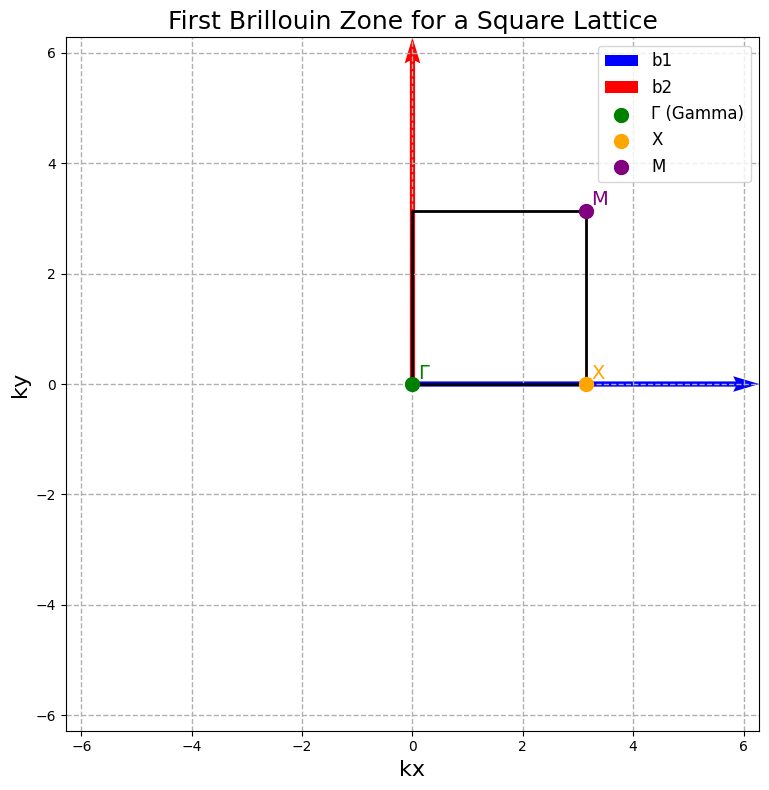

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the reciprocal lattice vectors for a square lattice
a1_star = np.array([2 * np.pi, 0])  # b1 = [2π, 0]
a2_star = np.array([0, 2 * np.pi])  # b2 = [0, 2π]

# High symmetry points in the Brillouin zone
Gamma = np.array([0, 0])
X = np.array([np.pi, 0])
M = np.array([np.pi, np.pi])

# Create a figure
fig, ax = plt.subplots(figsize=(8, 8))

# Plot the first Brillouin zone (square lattice)
# Define the corners of the square
corners = np.array([[0, 0], [np.pi, 0], [np.pi, np.pi], [0, np.pi], [0, 0]])

# Plot the square for the Brillouin zone boundary
ax.plot(corners[:, 0], corners[:, 1], color='black', linewidth=2)

# Plot the reciprocal lattice vectors (a1_star, a2_star)
ax.quiver(0, 0, a1_star[0], a1_star[1], angles='xy', scale_units='xy', scale=1, color='blue', label="b1", linewidth=2)
ax.quiver(0, 0, a2_star[0], a2_star[1], angles='xy', scale_units='xy', scale=1, color='red', label="b2", linewidth=2)

# Plot the high symmetry points
ax.scatter(Gamma[0], Gamma[1], color='green', s=100, label="Γ (Gamma)", zorder=5)
ax.scatter(X[0], X[1], color='orange', s=100, label="X", zorder=5)
ax.scatter(M[0], M[1], color='purple', s=100, label="M", zorder=5)

# Annotate the points with their names
ax.text(Gamma[0] + 0.1, Gamma[1] + 0.1, 'Γ', fontsize=14, color='green')
ax.text(X[0] + 0.1, X[1] + 0.1, 'X', fontsize=14, color='orange')
ax.text(M[0] + 0.1, M[1] + 0.1, 'M', fontsize=14, color='purple')

# Set plot limits and labels
ax.set_xlim(-2*np.pi, 2*np.pi)
ax.set_ylim(-2*np.pi, 2*np.pi)
ax.set_xlabel('kx', fontsize=16)
ax.set_ylabel('ky', fontsize=16)
ax.set_title('First Brillouin Zone for a Square Lattice', fontsize=18)

# Make sure the plot has equal scaling
ax.set_aspect('equal')

# Grid and legend
ax.grid(True, which='both', linestyle='--', linewidth=1)
ax.legend(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


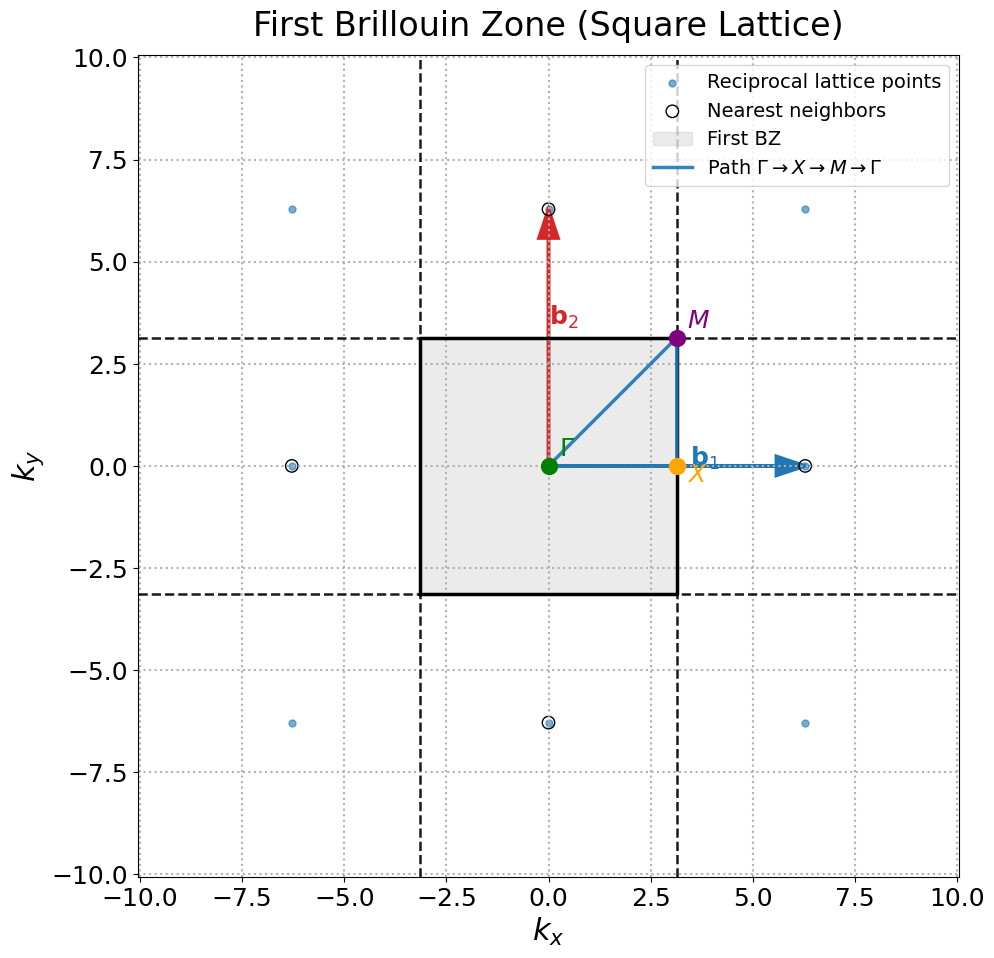

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# -------- parameters --------
a = 1.0  # lattice constant
b1 = np.array([2*np.pi/a, 0.0])
b2 = np.array([0.0, 2*np.pi/a])

# First BZ boundaries for a square lattice
k_edge = np.pi / a
BZ_vertices = np.array([
    [-k_edge, -k_edge],
    [ k_edge, -k_edge],
    [ k_edge,  k_edge],
    [-k_edge,  k_edge],
])

# High-symmetry points
Gamma = np.array([0.0, 0.0])
X = np.array([k_edge, 0.0])
M = np.array([k_edge, k_edge])

# -------- figure --------
fig, ax = plt.subplots(figsize=(10, 10))

# 1) Reciprocal lattice points
R = 3  # points from -R..R
pts = []
for h in range(-R, R+1):
    for k in range(-R, R+1):
        G = h*b1 + k*b2
        pts.append(G)
pts = np.array(pts)
ax.scatter(pts[:,0], pts[:,1], s=25, alpha=0.6, label="Reciprocal lattice points")

# 2) Basis vectors b1, b2 from Γ
ax.arrow(0, 0, b1[0], b1[1], head_width=0.15*k_edge, length_includes_head=True,
         color='tab:blue', linewidth=2.5)
ax.arrow(0, 0, b2[0], b2[1], head_width=0.15*k_edge, length_includes_head=True,
         color='tab:red', linewidth=2.5)
ax.text(*(b1*0.55), r"$\mathbf{b}_1$", fontsize=18, color='tab:blue')
ax.text(*(b2*0.55), r"$\mathbf{b}_2$", fontsize=18, color='tab:red')

# 3) Nearest neighbors
neighbors = np.array([
    [ 2*np.pi/a, 0.0],
    [-2*np.pi/a, 0.0],
    [0.0,  2*np.pi/a],
    [0.0, -2*np.pi/a],
])
ax.scatter(neighbors[:,0], neighbors[:,1], s=80, edgecolor='k', facecolor='none',
           label="Nearest neighbors")

# Perpendicular bisectors
ax.axvline(+k_edge, color='k', linestyle='--', linewidth=1.8, alpha=0.9)
ax.axvline(-k_edge, color='k', linestyle='--', linewidth=1.8, alpha=0.9)
ax.axhline(+k_edge, color='k', linestyle='--', linewidth=1.8, alpha=0.9)
ax.axhline(-k_edge, color='k', linestyle='--', linewidth=1.8, alpha=0.9)

# 4) First Brillouin Zone polygon
ax.fill(BZ_vertices[:,0], BZ_vertices[:,1], alpha=0.15, color='tab:gray', label="First BZ")
ax.plot(*np.vstack([BZ_vertices, BZ_vertices[0]]).T, color='k', linewidth=2.5)

# 5) High-symmetry points & path
ax.scatter(*Gamma, s=130, color='green', zorder=5)
ax.text(*(Gamma + np.array([0.08*k_edge, 0.08*k_edge])), r"$\Gamma$", fontsize=18, color='green')

ax.scatter(*X, s=130, color='orange', zorder=5)
ax.text(*(X + np.array([0.08*k_edge, -0.12*k_edge])), r"$X$", fontsize=18, color='orange')

ax.scatter(*M, s=130, color='purple', zorder=5)
ax.text(*(M + np.array([0.08*k_edge, 0.08*k_edge])), r"$M$", fontsize=18, color='purple')

path = np.array([Gamma, X, M, Gamma])
ax.plot(path[:,0], path[:,1], linewidth=2.5, alpha=0.9, label=r"Path $\Gamma \to X \to M \to \Gamma$")

# Cosmetics
lim = 3.2 * np.pi / a
ax.set_xlim(-lim, lim)
ax.set_ylim(-lim, lim)
ax.set_aspect('equal', adjustable='box')

ax.set_xlabel(r"$k_x$", fontsize=22)
ax.set_ylabel(r"$k_y$", fontsize=22)
ax.set_title("First Brillouin Zone (Square Lattice)",
             pad=14, fontsize=24)

ax.grid(True, linestyle=':', linewidth=1.5)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.legend(loc='upper right', frameon=True, fontsize=14)

plt.tight_layout()
plt.savefig("square_lattice_BZ_large_fonts.png", dpi=600)
plt.show()


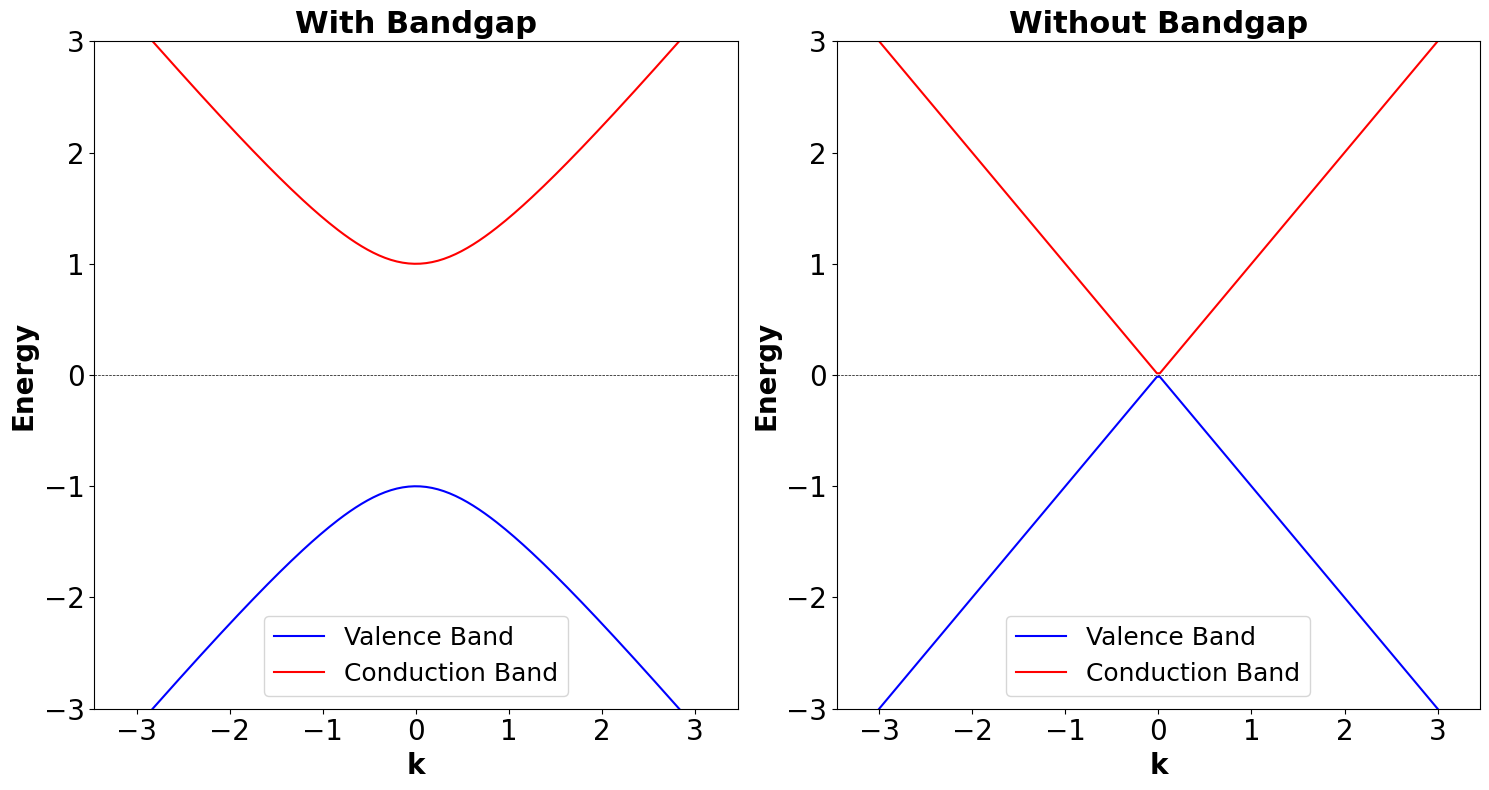

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt

# # k-points
# k = np.linspace(-np.pi, np.pi, 200)

# # Band structure with a bandgap
# E1_gap = -np.sqrt(k**2 + 1)  # valence band
# E2_gap = np.sqrt(k**2 + 1)   # conduction band

# # Band structure without a bandgap
# E1_no_gap = -np.abs(k)       # valence band
# E2_no_gap = np.abs(k)        # conduction band

# # Font sizes
# label_size = 14
# title_size = 16
# legend_size = 12
# tick_size = 12

# # --- First figure: With bandgap ---
# fig1, ax1 = plt.subplots(figsize=(5, 4))
# ax1.plot(k, E1_gap, 'b', label='Valence Band')
# ax1.plot(k, E2_gap, 'r', label='Conduction Band')
# ax1.set_title("With Bandgap", fontsize=title_size, weight='bold')
# ax1.set_xlabel("k", fontsize=label_size, weight='bold')
# ax1.set_ylabel("Energy", fontsize=label_size, weight='bold')
# ax1.axhline(0, color='black', linewidth=0.5, linestyle='--')
# ax1.set_ylim(-3, 3)
# ax1.legend(fontsize=legend_size)
# ax1.tick_params(axis='both', labelsize=tick_size)
# plt.tight_layout()
# plt.savefig("with_bandgap.png", dpi=700)


# # --- Second figure: Without bandgap ---
# fig2, ax2 = plt.subplots(figsize=(5, 4))
# ax2.plot(k, E1_no_gap, 'b', label='Valence Band')
# ax2.plot(k, E2_no_gap, 'r', label='Conduction Band')
# ax2.set_title("Without Bandgap", fontsize=title_size, weight='bold')
# ax2.set_xlabel("k", fontsize=label_size, weight='bold')
# ax2.set_ylabel("Energy", fontsize=label_size, weight='bold')
# ax2.axhline(0, color='black', linewidth=0.5, linestyle='--')
# ax2.set_ylim(-3, 3)
# ax2.legend(fontsize=legend_size)
# ax2.tick_params(axis='both', labelsize=tick_size)
# plt.tight_layout()
# plt.savefig("without_bandgap.png", dpi=700)
import numpy as np
import matplotlib.pyplot as plt

# k-points
k = np.linspace(-np.pi, np.pi, 200)

# Band structure with a bandgap
E1_gap = -np.sqrt(k**2 + 1)  # valence band
E2_gap = np.sqrt(k**2 + 1)   # conduction band

# Band structure without a bandgap
E1_no_gap = -np.abs(k)       # valence band
E2_no_gap = np.abs(k)        # conduction band

# Font sizes
label_size = 20
title_size = 22
legend_size = 18
tick_size = 20

# Create one figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

# With bandgap
axes[0].plot(k, E1_gap, 'b', label='Valence Band')
axes[0].plot(k, E2_gap, 'r', label='Conduction Band')
axes[0].set_title("With Bandgap", fontsize=title_size, weight='bold')
axes[0].set_xlabel("k", fontsize=label_size, weight='bold')
axes[0].set_ylabel("Energy", fontsize=label_size, weight='bold')
axes[0].axhline(0, color='black', linewidth=0.5, linestyle='--')
axes[0].set_ylim(-3, 3)
axes[0].legend(fontsize=legend_size)
axes[0].tick_params(axis='both', labelsize=tick_size)

# Without bandgap
axes[1].plot(k, E1_no_gap, 'b', label='Valence Band')
axes[1].plot(k, E2_no_gap, 'r', label='Conduction Band')
axes[1].set_title("Without Bandgap", fontsize=title_size, weight='bold')
axes[1].set_xlabel("k", fontsize=label_size, weight='bold')
axes[1].set_ylabel("Energy", fontsize=label_size, weight='bold')
axes[1].axhline(0, color='black', linewidth=0.5, linestyle='--')
axes[1].set_ylim(-3, 3)
axes[1].legend(fontsize=legend_size)
axes[1].tick_params(axis='both', labelsize=tick_size)

plt.tight_layout()
plt.savefig("bandgap_comparison.png", dpi=700)
plt.show()



Saved d_k_vector_field_graphene_large.png


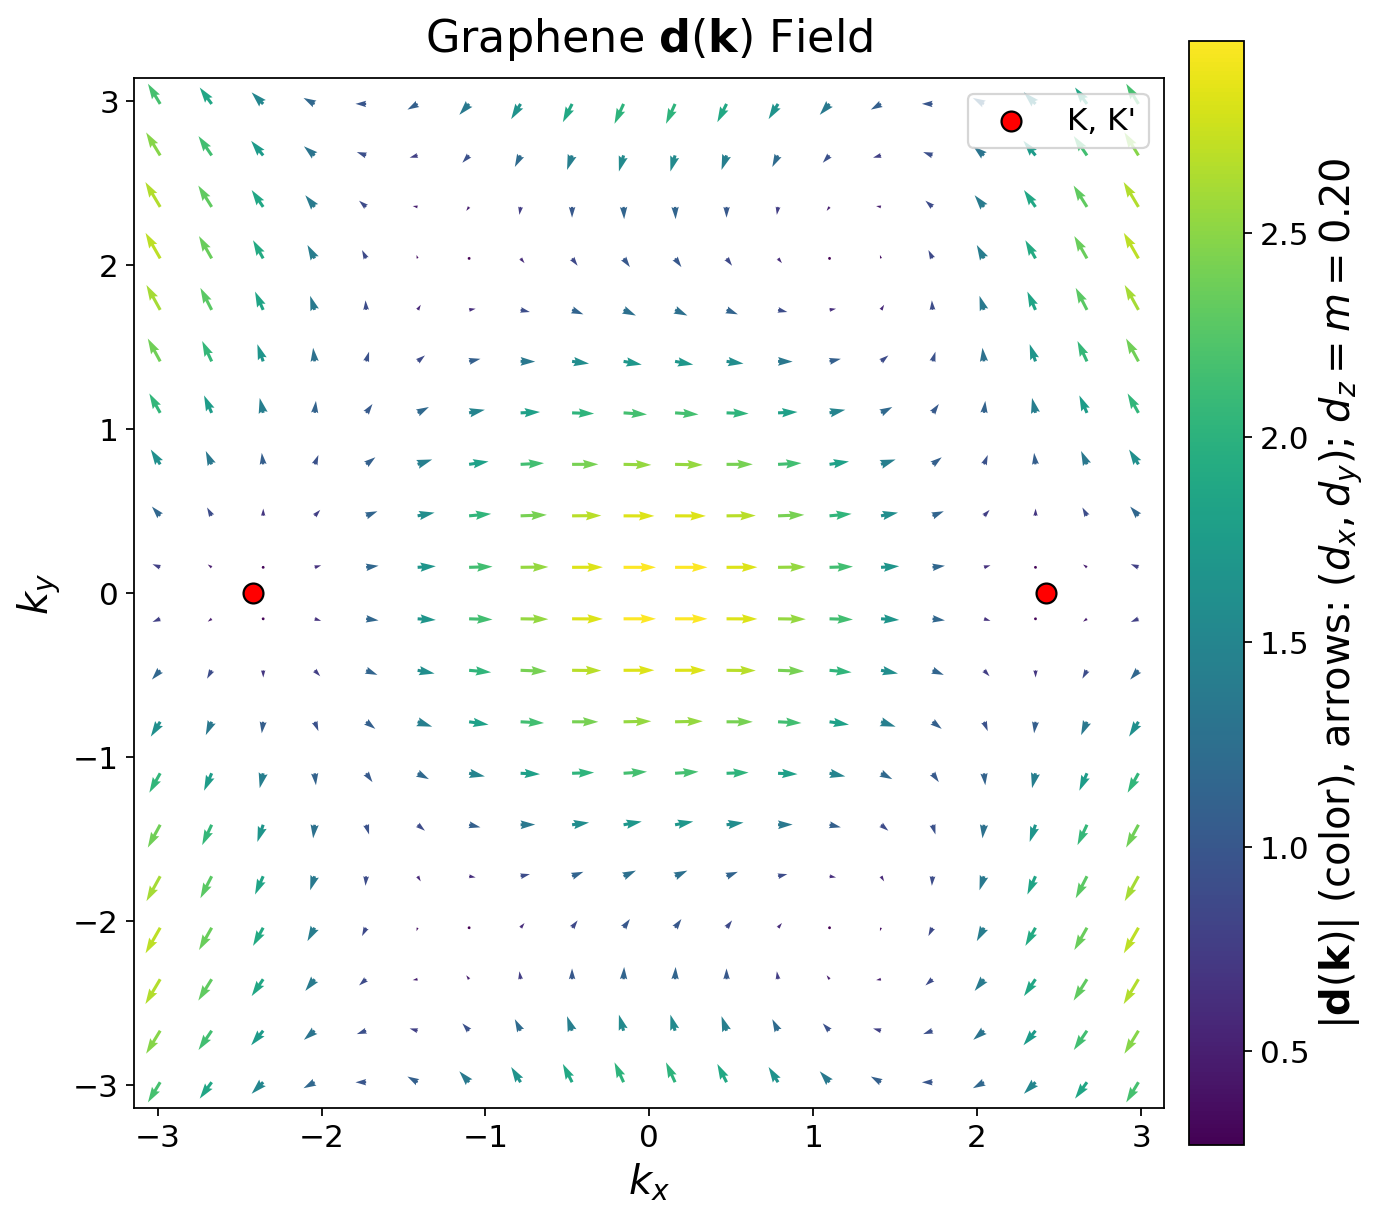

In [ ]:
# d_k_vector_field_graphene_large.py
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    "font.size": 16,       # Larger default font size
    "axes.labelsize": 18,  # Axis labels bigger
    "axes.titlesize": 20,  # Title bigger
    "xtick.labelsize": 14, # Tick label size
    "ytick.labelsize": 14,
    "legend.fontsize": 14, # Legend font size
    "figure.dpi": 160
})

# Lattice conventions (a = 1)
delta = np.array([
    [ 0.0, -1.0],
    [ np.sqrt(3)/2, 0.5],
    [-np.sqrt(3)/2, 0.5]
])

# Brillouin zone sampling
nk = 41
kx = np.linspace(-np.pi, np.pi, nk)
ky = np.linspace(-np.pi, np.pi, nk)
KX, KY = np.meshgrid(kx, ky)

t = 1.0
m = 0.2  # mass term (d_z)

def structure_factor(kx, ky):
    k = np.stack([kx, ky], axis=-1)
    phase = (k[..., None, :] * delta[None, None, :, :]).sum(-1)
    f = np.exp(1j * phase).sum(-1)
    return f

f = structure_factor(KX, KY)
dx = t * np.real(f)
dy = -t * np.imag(f)
dz = m * np.ones_like(dx)

mag = np.sqrt(dx**2 + dy**2 + dz**2)

fig, ax = plt.subplots(figsize=(9, 8))  # Larger figure
ax.set_aspect("equal")

# Quiver for (d_x, d_y), color by |d|
skip = (slice(1, -1, 2), slice(1, -1, 2))
Q = ax.quiver(KX[skip], KY[skip], dx[skip], dy[skip],
              mag[skip], cmap="viridis", angles="xy",
              scale_units="xy", scale=15, linewidth=0.6)

# Colorbar
cbar = plt.colorbar(Q, ax=ax, pad=0.02)
cbar.set_label(r"$|\mathbf{d}(\mathbf{k})|$ (color), arrows: $(d_x,d_y)$; $d_z=m=%.2f$" % m, fontsize=18)
cbar.ax.tick_params(labelsize=14)

# Mark K and K' points
K  = np.array([ 4*np.pi/(3*np.sqrt(3)), 0.0])
Kp = np.array([-4*np.pi/(3*np.sqrt(3)), 0.0])
ax.scatter([K[0], Kp[0]], [K[1], Kp[1]], s=80, c="red", ec="black", zorder=5, label="K, K'")

# Labels and title
ax.set_xlabel(r"$k_x$")
ax.set_ylabel(r"$k_y$")
ax.set_title(r"Graphene $\mathbf{d}(\mathbf{k})$ Field", pad=12)
ax.legend(loc="upper right", frameon=True)

ax.set_xlim(-np.pi, np.pi)
ax.set_ylim(-np.pi, np.pi)

plt.tight_layout()
plt.savefig("d_k_vector_field_graphene_large.png", bbox_inches="tight")
print("Saved d_k_vector_field_graphene_large.png")


/tmp/ipython-input-4115952688.py:68: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Saved band_structure_gap_closing_topology.png


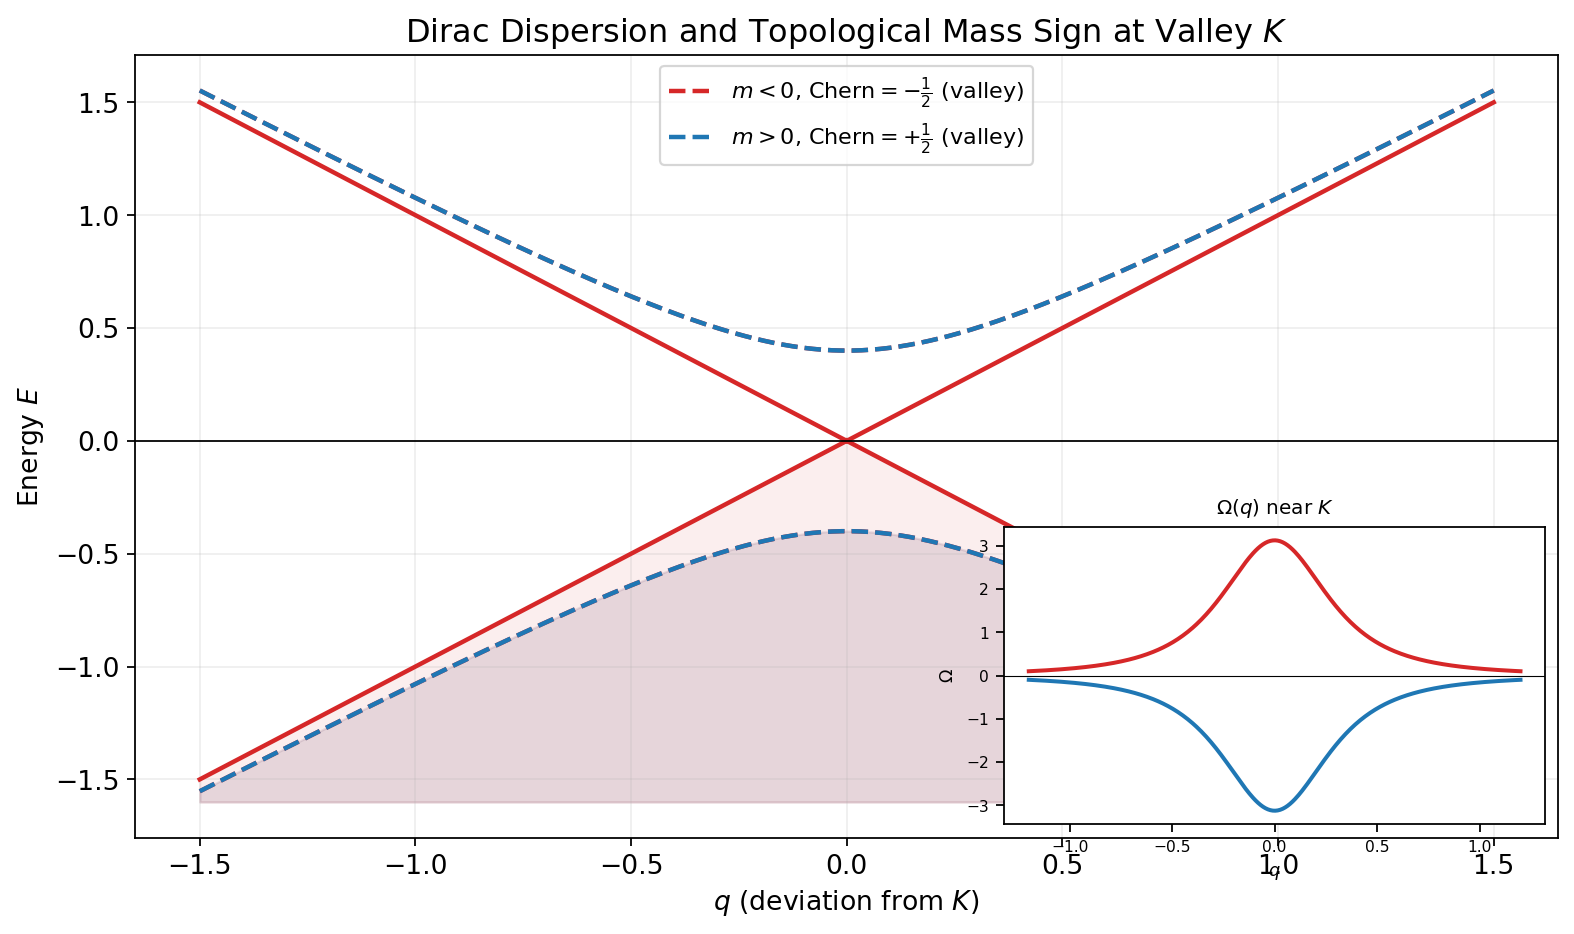

In [ ]:
# dirac_dispersion_topology.py
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    "font.size": 12,
    "figure.dpi": 160
})

# Parameters
vF = 1.0
qmax = 1.5
q = np.linspace(-qmax, qmax, 400)
m_vals = [-0.4, 0.0, 0.4]
colors = {"pos": "#1f77b4", "neg": "#d62728", "zero": "green"}

# Berry curvature for massive Dirac fermion near K:
# Omega(q) = - m vF^2 / ( 2 [ (vF q)^2 + m^2 ]^(3/2) )
def berry_curvature(q, m):
    return -m * vF**2 / (2 * ((vF*q)**2 + m**2)**(1.5))

fig, ax = plt.subplots(figsize=(10,6))

# Plot dispersions with shading for valence bands
for m in m_vals:
    E = np.sqrt((vF*q)**2 + m**2)
    label = None
    style = "-"
    if m < 0:
        color = colors["neg"]
        label = fr"$m<0$, Chern$=-\frac{{1}}{{2}}$ (valley)"
        style = "--"
    elif m > 0:
        color = colors["pos"]
        label = fr"$m>0$, Chern$=+\frac{{1}}{{2}}$ (valley)"
        style = "--"


    # conduction band
    ax.plot(q,  E, ls=style, lw=2, color=color, label=label)
    # valence band
    ax.plot(q, -E, ls=style, lw=2, color=color)

    # Shade valence band region to highlight topology
    ax.fill_between(q, -E, -1.6, color=color, alpha=0.08)

# Decorations
ax.set_xlabel(r"$q$ (deviation from $K$)")
ax.set_ylabel(r"Energy $E$")
ax.set_title(r"Dirac Dispersion and Topological Mass Sign at Valley $K$")
ax.axhline(0, color="black", lw=0.8)
ax.legend(frameon=True, fontsize=10)
ax.grid(alpha=0.2)

# Inset: Berry curvature near q=0 for m>0 and m<0
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
ax_in = inset_axes(ax, width="38%", height="38%", loc="lower right")
q_in = np.linspace(-1.2, 1.2, 400)
for m, color in [(-0.4, colors["neg"]), (0.4, colors["pos"])]:
    Omega = berry_curvature(q_in, m)
    ax_in.plot(q_in, Omega, color=color, lw=1.8, label=fr"$m={m}$")
ax_in.axhline(0, color="black", lw=0.5)
ax_in.set_title(r"$\Omega(q)$ near $K$", fontsize=9)
ax_in.set_xlabel(r"$q$", fontsize=8)
ax_in.set_ylabel(r"$\Omega$", fontsize=8)
ax_in.tick_params(axis='both', which='major', labelsize=7)

plt.tight_layout()
plt.savefig("band_structure_gap_closing_topology.png", bbox_inches="tight")
print("Saved band_structure_gap_closing_topology.png")


Saved pauli_pseudospin_graphene.png


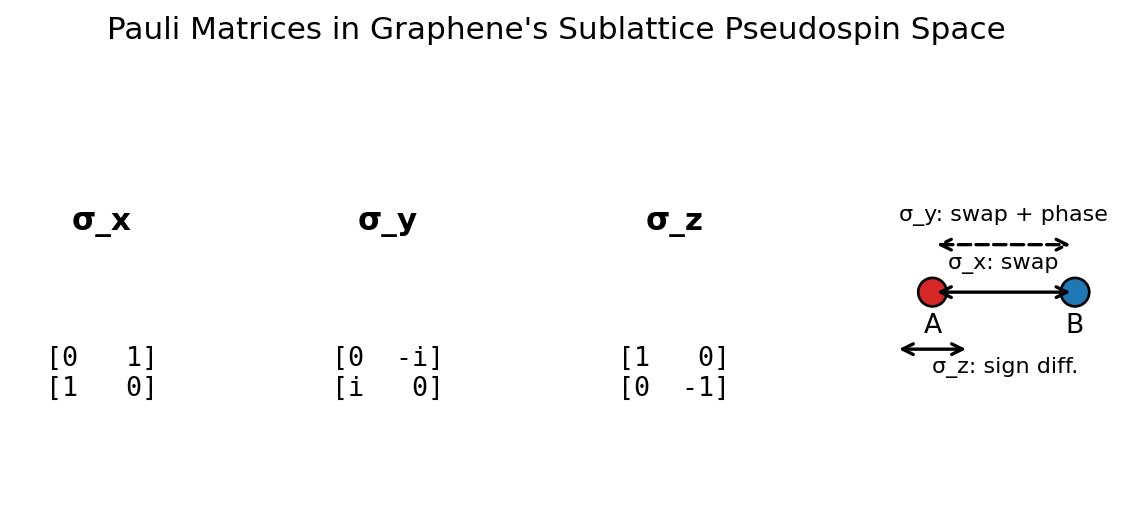

In [ ]:
# pauli_pseudospin_graphene_colab_safe.py
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({
    "text.usetex": False,  # No LaTeX
    "font.size": 12,
    "figure.dpi": 160
})

fig = plt.figure(figsize=(9, 3.5))
gs = fig.add_gridspec(1, 4, width_ratios=[1, 1, 1, 1.5], wspace=0.6)

# Function to show a matrix as nicely aligned monospace text
def show_matrix(ax, label, matrix_str):
    ax.axis("off")
    ax.text(0.5, 0.65, label, ha="center", va="center",
            fontsize=14, fontweight="bold")
    ax.text(0.5, 0.3, matrix_str, ha="center", va="center",
            fontsize=12, family="monospace")

# Panels for sigma_x, sigma_y, sigma_z
sigma_x = "[0   1]\n[1   0]"
sigma_y = "[0  -i]\n[i   0]"
sigma_z = "[1   0]\n[0  -1]"

ax0 = fig.add_subplot(gs[0, 0])
show_matrix(ax0, "σ_x", sigma_x)

ax1 = fig.add_subplot(gs[0, 1])
show_matrix(ax1, "σ_y", sigma_y)

ax2 = fig.add_subplot(gs[0, 2])
show_matrix(ax2, "σ_z", sigma_z)

# Pseudospin diagram
ax3 = fig.add_subplot(gs[0, 3])
ax3.set_aspect("equal")
ax3.axis("off")

A = np.array([0.0, 0.0])
B = np.array([1.5, 0.0])

def draw_node(ax, xy, label, color):
    c = plt.Circle(xy, 0.15, fc=color, ec="black", lw=1.2)
    ax.add_patch(c)
    ax.text(xy[0], xy[1]-0.35, label, ha="center", va="center", fontsize=12)

draw_node(ax3, A, "A", "#d62728")
draw_node(ax3, B, "B", "#1f77b4")

# sigma_x: swap
ax3.annotate("", xy=B, xytext=A,
             arrowprops=dict(arrowstyle="<->", lw=1.5))
ax3.text(0.75, 0.25, "σ_x: swap", ha="center", fontsize=10)

# sigma_y: swap + phase
ax3.annotate("", xy=[B[0], B[1]+0.5], xytext=[A[0], A[1]+0.5],
             arrowprops=dict(arrowstyle="<->", lw=1.5, ls="dashed"))
ax3.text(0.75, 0.75, "σ_y: swap + phase", ha="center", fontsize=10)

# sigma_z: sign diff
ax3.annotate("", xy=[A[0]-0.4, A[1]-0.6], xytext=[A[0]+0.4, A[1]-0.6],
             arrowprops=dict(arrowstyle="<->", lw=1.5))
ax3.text(0.0, -0.85, "σ_z: sign diff.", ha="left", fontsize=10)

ax3.set_xlim(-0.6, 2.1)
ax3.set_ylim(-1.0, 1.1)

fig.suptitle("Pauli Matrices in Graphene's Sublattice Pseudospin Space", fontsize=14)
plt.savefig("pauli_pseudospin_graphene.png", bbox_inches="tight")
print("Saved pauli_pseudospin_graphene.png")


'honeycomb_bandstructures.png'

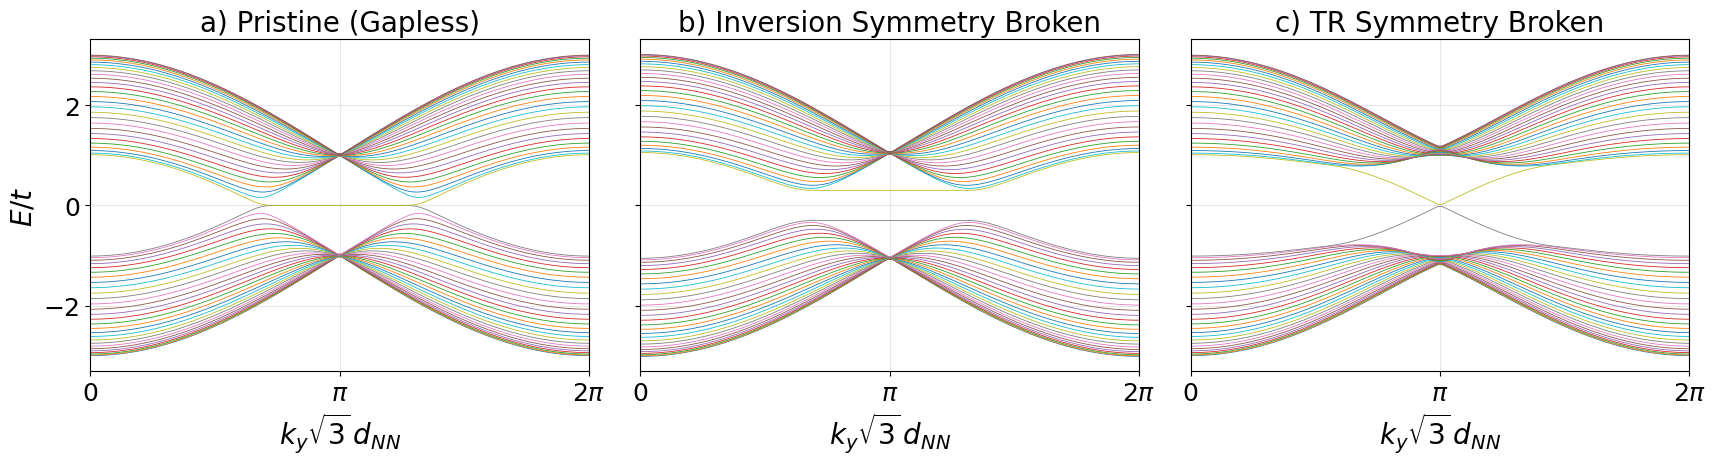

In [ ]:
# This script generates the band structures for a honeycomb (graphene/Haldane) ribbon in three regimes:
# (a) pristine graphene (Dirac cones),
# (b) inversion symmetry broken by sublattice mass M (trivial gap),
# (c) time-reversal symmetry broken by complex next-nearest-neighbor hopping (Haldane model, chiral edge states).
#
# Geometry:
# - Finite along x with Nx "brick-wall" unit cells, periodic along y (Bloch momentum ky).
# - One A and one B site per x-cell (so per ky the Hamiltonian size is 2*Nx).
#
# Model:
#   H = -t Σ_<i,j> c_i^\dagger c_j
#       + M Σ_i ξ_i c_i^\dagger c_i                      (ξ_i = +1 on A, -1 on B)
#       - t2 Σ_<<i,j>> e^{i ν_ij φ} c_i^\dagger c_j      (Haldane term; ν_ij = ±1 sets chirality)
#
# Units:
# - We set the nearest-neighbor distance d_NN = 1.
# - The translation along the ribbon (y) has length √3 * d_NN in our brick-wall convention,
#   so we label the x-axis as ky * √3 d_NN to match the caption.
#
# The code saves a single figure "honeycomb_bandstructures.png" in /mnt/data and also shows it here.

import numpy as np
import matplotlib.pyplot as plt

def haldane_ribbon_hamiltonian(ky, Nx, t=1.0, M=0.0, t2=0.0, phi=0.0):
    """
    Build the 2*Nx x 2*Nx Bloch Hamiltonian for a zigzag-like ribbon using a brick-wall representation.
    Periodic along y with Bloch momentum ky, open along x with Nx 'columns'.
    Sublattice order per column m: (A_m, B_m).

    Nearest-neighbor bonds from A_m connect to:
        B_m        (Δm=0, Δn=0)
        B_{m-1}    (Δm=-1, Δn=0)
        B_m (up)   (Δm=0, Δn=-1)  -> adds phase e^{-i ky}
    And hermitian conjugates provide the remaining three bonds for B.

    Next-nearest-neighbor (same sublattice) bonds implement the Haldane term with chirality ν_ij = ±1:
      For A_m: to A_{m-1} (Δm=-1, Δn=0, ν=+1),
                A_m(up)  (Δm=0,  Δn=+1, ν=+1),
                A_{m-1}(up) (Δm=-1, Δn=+1, ν=-1).
      For B_m: to B_{m+1} (Δm=+1, Δn=0, ν=+1),
                B_m(down) (Δm=0,  Δn=-1, ν=+1),
                B_{m+1}(down) (Δm=+1, Δn=-1, ν=-1).
    This pattern yields the correct flux ±3φ around each hexagon (Haldane).
    """
    dim = 2 * Nx
    H = np.zeros((dim, dim), dtype=complex)
    phase_up = np.exp(1j * ky)     # hopping that goes to n+1
    phase_down = np.exp(-1j * ky)  # hopping that goes to n-1

    # On-site sublattice mass
    for m in range(Nx):
        iA = 2*m
        iB = 2*m + 1
        H[iA, iA] += M
        H[iB, iB] += -M

    # Nearest-neighbor t (A -> B)
    for m in range(Nx):
        iA = 2*m
        iB = 2*m + 1

        # A_m -> B_m  (Δm=0, Δn=0)
        H[iA, iB] += -t
        H[iB, iA] += -t

        # A_m -> B_{m-1}  (Δm=-1, Δn=0)
        if m-1 >= 0:
            jB = 2*(m-1) + 1
            H[iA, jB] += -t
            H[jB, iA] += -t

        # A_m -> B_m (up) -> phase e^{-i ky} on conjugate?
        # Convention: bond from A_m to B_m with Δn=-1 (down), so add e^{-i ky}
        H[iA, iB] += 0  # already included the in-plane; the Bloch one goes to 'down' direction
        # Add the 'down' bond A_m -> B_m(down): (Δm=0, Δn=-1)
        H[iA, iB] += -t * phase_down
        H[iB, iA] += -t * np.conjugate(phase_down)

    # Next-nearest-neighbor t2 with phases (Haldane)
    if abs(t2) > 0 or abs(phi) > 0:
        eip = np.exp(1j * phi)
        eim = np.exp(-1j * phi)
        for m in range(Nx):
            iA = 2*m
            iB = 2*m + 1
            # --- A sublattice ---
            # A_m -> A_{m-1} (ν=+1, Δn=0)
            if m-1 >= 0:
                jA = 2*(m-1)
                H[iA, jA] += -t2 * eip
                H[jA, iA] += -t2 * eim
            # A_m -> A_m(up) (ν=+1, Δn=+1)
            H[iA, iA] += 0  # self; off-diagonal with Bloch phase
            H[iA, iA] += 0
            H[iA, iA] += 0
            H[iA, iA] += 0
            H[iA, iA] += 0
            H[iA, iA] += 0
            H[iA, iA] += 0
            H[iA, iA] += 0
            H[iA, iA] += 0
            # Actually add the off-diagonal via Bloch phase:
            # (Δm=0, Δn=+1)
            H[iA, iA] += 0  # keep diagonal intact (no on-site from this term)
            # Implement as off-diagonal: A_m couples to its Bloch replica with phase (handled by ky)
            # Since we work with a single ky slice, the coupling becomes just a complex number on the same index:
            # For NNN across periodic direction, it's an on-site Peierls-like term:
            H[iA, iA] += -t2 * eip * phase_up + -t2 * eim * np.conjugate(phase_up)  # add both directions

            # A_m -> A_{m-1}(up) (ν=-1, Δm=-1, Δn=+1)
            if m-1 >= 0:
                jA = 2*(m-1)
                H[iA, jA] += -t2 * eim * phase_up
                H[jA, iA] += -t2 * eip * np.conjugate(phase_up)

            # --- B sublattice ---
            # B_m -> B_{m+1} (ν=+1, Δm=+1, Δn=0)
            if m+1 < Nx:
                jB = 2*(m+1) + 1
                H[iB, jB] += -t2 * eip
                H[jB, iB] += -t2 * eim
            # B_m -> B_m(down) (ν=+1, Δn=-1)
            H[iB, iB] += -t2 * eip * phase_down + -t2 * eim * np.conjugate(phase_down)
            # B_m -> B_{m+1}(down) (ν=-1, Δm=+1, Δn=-1)
            if m+1 < Nx:
                jB = 2*(m+1) + 1
                H[iB, jB] += -t2 * eim * phase_down
                H[jB, iB] += -t2 * eip * np.conjugate(phase_down)
    return H

def bands_vs_ky(Nx=30, Nky=64, params_list=None):
    if params_list is None:
        params_list = [
            {"t":1.0, "M":0.0, "t2":0.0, "phi":0.0, "title":"a) Pristine (Gapless)"},
            {"t":1.0, "M":0.3, "t2":0.0, "phi":0.0, "title":"b) Inversion Symmetry Broken"},
            {"t":1.0, "M":0.0, "t2":0.15, "phi":np.pi/2, "title":"c) TR Symmetry Broken"},
        ]
    ky_list = np.linspace(0, 2*np.pi, Nky)
    all_eigs = []
    for prm in params_list:
        eigs = []
        for ky in ky_list:
            H = haldane_ribbon_hamiltonian(ky, Nx, **{k:prm[k] for k in ("t","M","t2","phi")})
            w = np.linalg.eigvalsh(H)
            eigs.append(w.real)
        all_eigs.append(np.array(eigs).T)  # shape (#bands, Nky)
    return ky_list, all_eigs, params_list

# Compute and plot
Nx = 28
Nky = 120
ky_list, all_eigs, params_list = bands_vs_ky(Nx=Nx, Nky=Nky)

# x-axis label uses ky * sqrt(3) d_NN
x_ticks = [0, np.pi, 2*np.pi]
x_ticklabels = ["0", r"$\pi$", r"$2\pi$"]

fig, axes = plt.subplots(1, 3, figsize=(17.5, 5), sharey=True)
for ax, eigs, prm in zip(axes, all_eigs, params_list):
    for band in eigs:
        ax.plot(ky_list, band, lw=0.6)
    ax.set_xlim(0, 2*np.pi)
    ax.set_xticks(x_ticks, x_ticklabels)
    ax.set_xlabel(r"$k_y \sqrt{3}\, d_{NN}$")
    ax.set_title(prm["title"])
    ax.grid(True, alpha=0.3)
axes[0].set_ylabel(r"$E/t$")
fig.tight_layout()
out_path = "honeycomb_bandstructures.png"
plt.savefig(out_path, dpi=200, bbox_inches="tight")
out_path


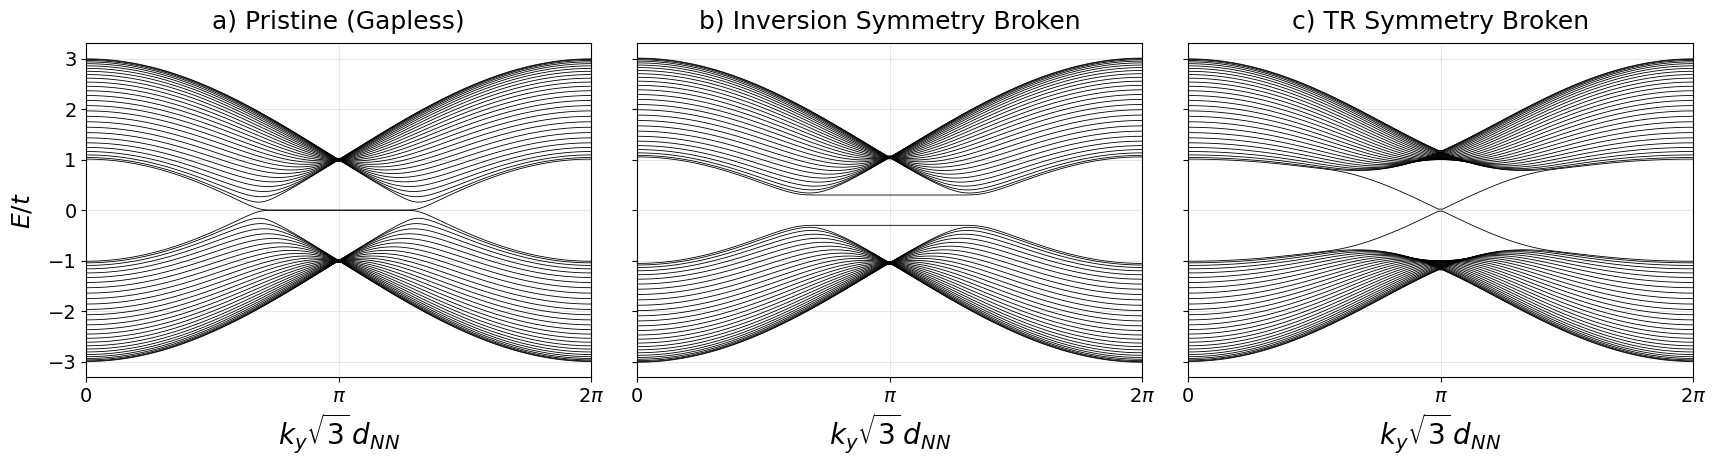

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Make all fonts larger globally
plt.rcParams.update({
    "font.size": 18,        # base font size
    "axes.titlesize": 20,   # subplot titles
    "axes.labelsize": 20,   # x/y axis labels
    "xtick.labelsize": 18,  # tick labels
    "ytick.labelsize": 18
})

# ... (your haldane_ribbon_hamiltonian and bands_vs_ky definitions stay the same) ...

# Compute and plot
Nx = 28
Nky = 120
ky_list, all_eigs, params_list = bands_vs_ky(Nx=Nx, Nky=Nky)

# x-axis label uses ky * sqrt(3) d_NN
x_ticks = [0, np.pi, 2*np.pi]
x_ticklabels = ["0", r"$\pi$", r"$2\pi$"]

fig, axes = plt.subplots(1, 3, figsize=(17.5, 5), sharey=True)
for ax, eigs, prm in zip(axes, all_eigs, params_list):
    for band in eigs:
        ax.plot(ky_list, band, lw=0.6, color='k')
    ax.set_xlim(0, 2*np.pi)
    ax.set_xticks(x_ticks, x_ticklabels)
    ax.set_xlabel(r"$k_y \sqrt{3}\, d_{NN}$")
    ax.set_title(prm["title"], fontsize=18, pad=10)
    ax.grid(True, alpha=0.3)
    ax.tick_params(axis='both', which='major', labelsize=14)

axes[0].set_ylabel(r"$E/t$", fontsize=18, labelpad=10)

fig.tight_layout()
plt.savefig("honeycomb_bandstructures.png", dpi=200, bbox_inches="tight")
plt.show()


In [ ]:
# x-axis label uses ky * sqrt(3) d_NN
x_ticks = [0, np.pi, 2*np.pi]
x_ticklabels = ["0", r"$\pi$", r"$2\pi$"]

for eigs, prm in zip(all_eigs, params_list):
    fig, ax = plt.subplots(figsize=(6, 5))
    for band in eigs:
        ax.plot(ky_list, band, lw=0.6, color='k')
    ax.set_xlim(0, 2*np.pi)
    ax.set_xticks(x_ticks, x_ticklabels)
    ax.set_xlabel(r"$k_y \sqrt{3}\, d_{NN}$", fontsize=18, labelpad=8)
    ax.set_ylabel(r"$E/t$", fontsize=18, labelpad=8)

    # Remove the leading "a) ", "b) ", "c) " if present
    clean_title = prm["title"]
    if ")" in clean_title[:3]:
        clean_title = clean_title.split(")", 1)[1].strip()

    ax.set_title(clean_title, fontsize=18, pad=10)
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.grid(True, alpha=0.3)

    fig.tight_layout()

    # Create a safe filename from the cleaned title
    safe_name = clean_title.lower().replace(" ", "_")
    out_path = f"{safe_name}.png"
    plt.savefig(out_path, dpi=200, bbox_inches="tight")
    plt.close(fig)
    print(f"Saved {out_path}")


Saved pristine_(gapless).png
Saved inversion_symmetry_broken.png
Saved tr_symmetry_broken.png


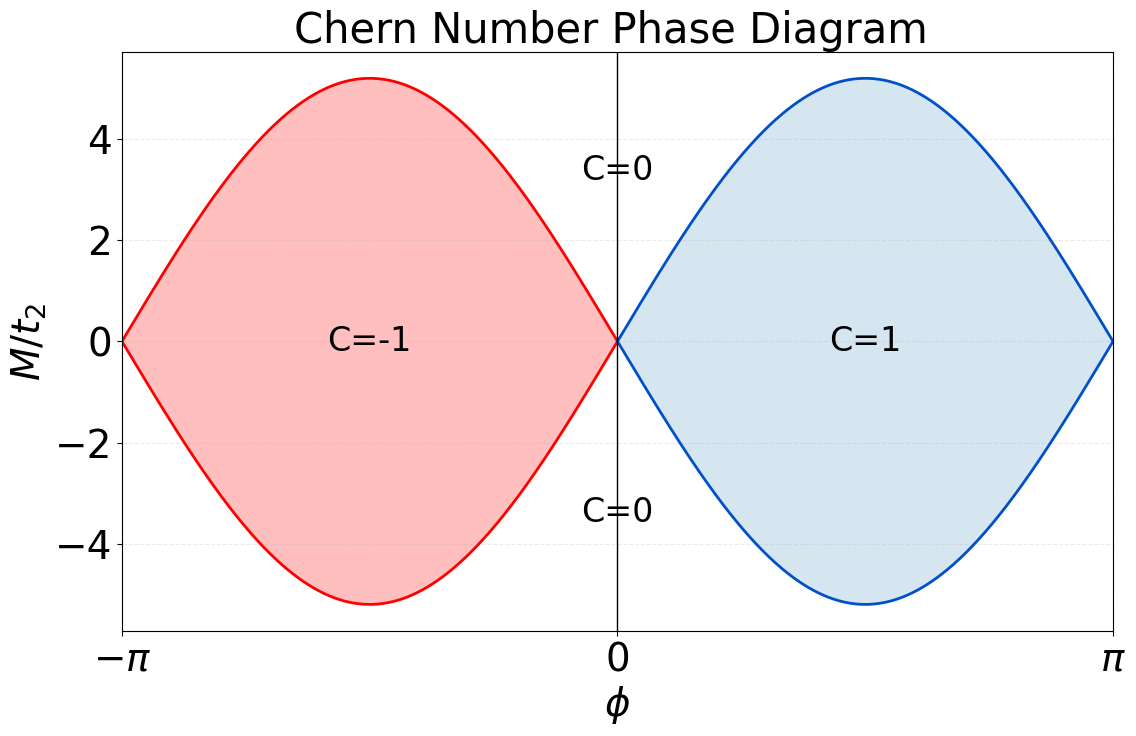

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ---------- parameters ----------
t2 = 5.0 / (3*np.sqrt(3))     # sets lobe height
A_norm = 3*np.sqrt(3)         # amplitude in normalized units ΔM/t2
phi = np.linspace(-np.pi, np.pi, 1000)

# analytical boundaries in normalized units
M_plus =  +A_norm * np.sin(phi)
M_minus = -A_norm * np.sin(phi)

# ---------- styling ----------
plt.rcParams.update({
    "font.size": 28,        # base font size
    "axes.labelsize": 28,   # x/y labels
    "axes.titlesize": 30,   # title
    "xtick.labelsize": 28,  # tick labels
    "ytick.labelsize": 28
})

fig, ax = plt.subplots(figsize=(12, 8))

# Shade Chern regions
left  = phi < 0
right = phi > 0
ax.fill_between(phi[left],  M_minus[left], M_plus[left],
                facecolor="red", alpha=0.25, edgecolor="none")   # C=-1 red
ax.fill_between(phi[right], M_minus[right], M_plus[right],
                facecolor="#1f77b4", alpha=0.18, edgecolor="none")  # C=+1 blue

# Boundaries
ax.plot(phi[left],  M_plus[left],  color="red", lw=2)
ax.plot(phi[left],  M_minus[left], color="red", lw=2)
ax.plot(phi[right], M_plus[right], color="#0050c9", lw=2)
ax.plot(phi[right], M_minus[right],color="#0050c9", lw=2)

# Axes, ticks, grid
ax.axvline(0, color="k", lw=1)
ax.set_xlim(-np.pi, np.pi)
ax.set_ylim(-1.1*A_norm, 1.1*A_norm)
ax.set_xticks([-np.pi, 0, np.pi], [r"$-\pi$", r"$0$", r"$\pi$"])
ax.set_xlabel(r"$\phi$")
ax.set_ylabel(r"$ M / t_2$")
ax.grid(True, alpha=0.25, linestyle="--", linewidth=0.8)
ax.set_title("Chern Number Phase Diagram ")

# Labels for regions
ax.text(-np.pi/2, 0,  "C=-1", ha="center", va="center", fontsize=24)
ax.text( np.pi/2, 0,  "C=1",  ha="center", va="center", fontsize=24)
ax.text(0,  0.65*A_norm, "C=0", ha="center", va="center", fontsize=24)
ax.text(0, -0.65*A_norm, "C=0", ha="center", va="center", fontsize=24)

fig.tight_layout()
plt.savefig("haldane_phase_diagram_normalized.png", dpi=200, bbox_inches="tight")
plt.show()


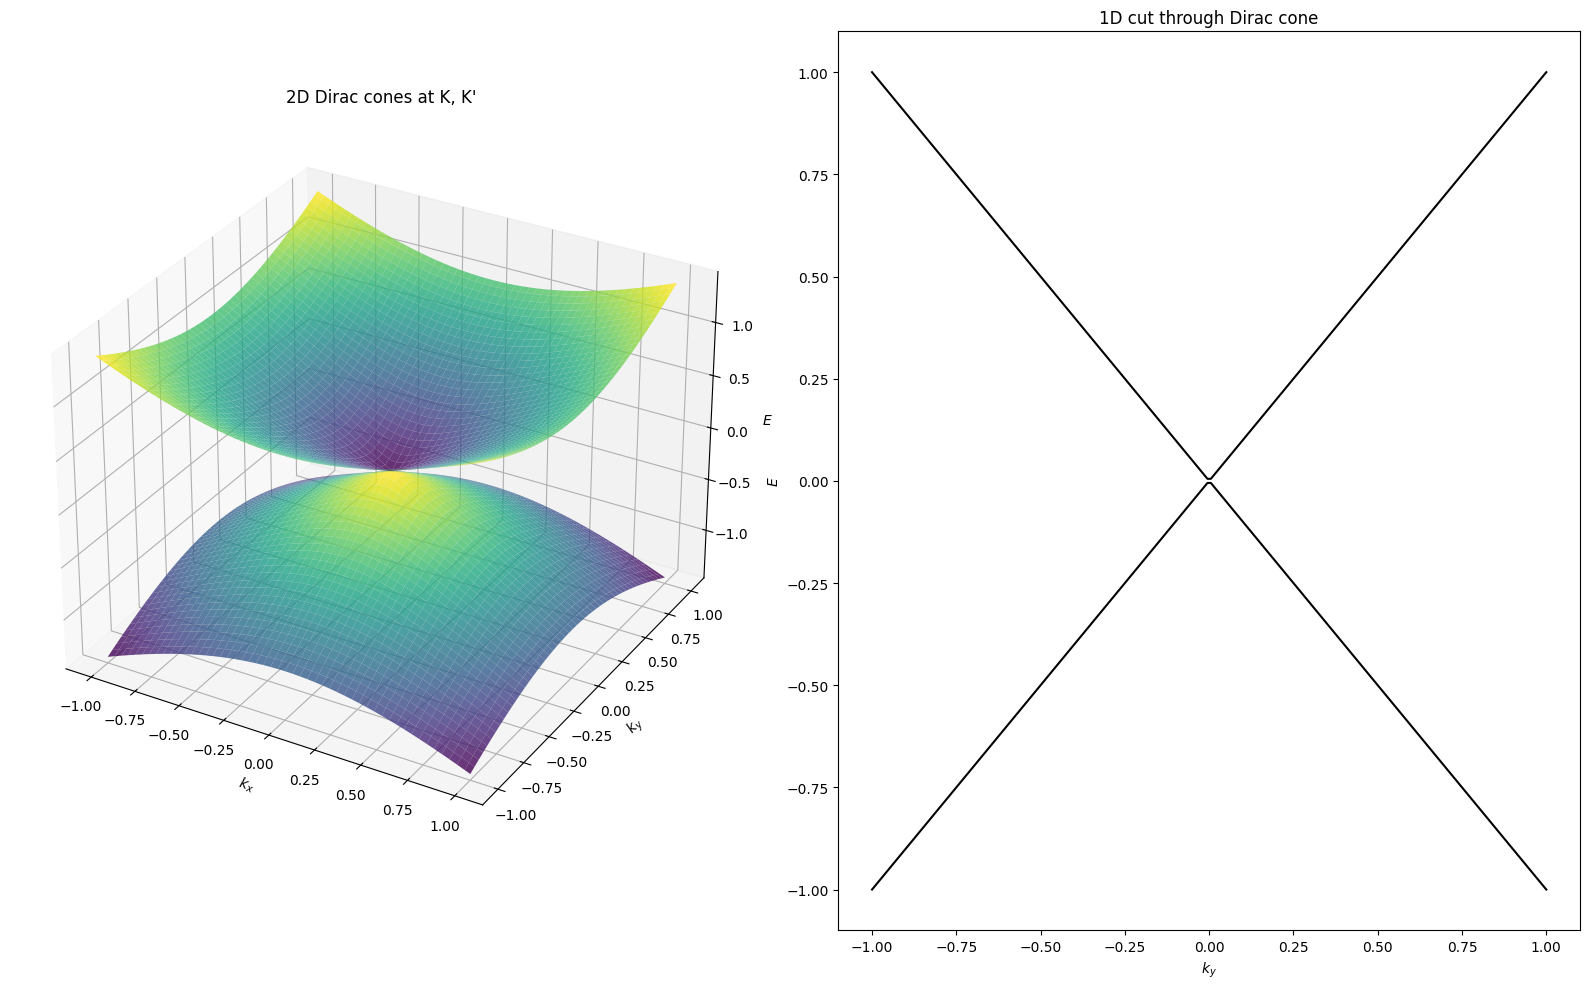

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define a Dirac cone dispersion near K-point
kx = np.linspace(-1, 1, 200)
ky = np.linspace(-1, 1, 200)
KX, KY = np.meshgrid(kx, ky)

# Linear Dirac dispersion E = ± vF * sqrt(kx^2 + ky^2)
vF = 1.0
E_plus = vF * np.sqrt(KX**2 + KY**2)
E_minus = -E_plus

# Plot 3D cones
fig = plt.figure(figsize=(16,10))

# Left: full Dirac cone in 3D
ax1 = fig.add_subplot(1,2,1, projection='3d')
ax1.plot_surface(KX, KY, E_plus, cmap="viridis", alpha=0.8)
ax1.plot_surface(KX, KY, E_minus, cmap="viridis", alpha=0.8)
ax1.set_title("2D Dirac cones at K, K'", fontsize=12)
ax1.set_xlabel("$k_x$")
ax1.set_ylabel("$k_y$")
ax1.set_zlabel("$E$")

# Right: 1D cut along ky (kx=0)
ax2 = fig.add_subplot(1,2,2)
ky_line = np.linspace(-1,1,200)
E_line_plus = vF * np.abs(ky_line)
E_line_minus = -E_line_plus
ax2.plot(ky_line, E_line_plus, 'k')
ax2.plot(ky_line, E_line_minus, 'k')
ax2.set_title("1D cut through Dirac cone", fontsize=12)
ax2.set_xlabel("$k_y$")
ax2.set_ylabel("$E$")

plt.tight_layout()
plt.show()
